In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import numpy as np
import os

In [2]:
from keras.layers import Dropout
Dropout(rate=0.5)

In [3]:
from keras.layers import BatchNormalization

Sequential([
    BatchNormalization(input_shape=(8, 8, 2))
]).summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 8, 8, 2)          8         
 ormalization)                                                   
                                                                 
Total params: 8
Trainable params: 4
Non-trainable params: 4
_________________________________________________________________


In [4]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [5]:
# установка параметров нейросети
batch_size = 512
num_classes = 10
epochs = 5
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# разделение тренировочной и тестовой выборки
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'тренировочные примеры')
print(X_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1

y_train = to_categorical(y_train, num_classes)
y_test_source = y_test
y_test = to_categorical(y_test, num_classes)


X_train = X_train / 255.0
X_test = X_test / 255.0

X_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


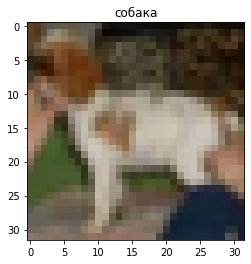

In [6]:
N = 12

plt.imshow(X_test[N])
plt.title(classes[np.argmax(y_test[N,:])])
plt.show()

In [7]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(16, (5, 5), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(16, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()
# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        1216      
                                                                 
 activation (Activation)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        6416      
                                                                 
 activation_1 (Activation)   (None, 28, 28, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 16)        0         
                                                      

In [8]:
data_augmentation = True

In [9]:
%%time
if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=10, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0.2, 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)


    train_gen = datagen.flow(X_train, 
                             y_train,
                             batch_size=batch_size)

    # запуск data augmentation через fit_generator
    model.fit(train_gen,
              epochs=epochs,
              validation_data=(X_test, y_test))

Использование data augmentation
Epoch 1/5
98/98 [==============================] - 96s 956ms/step - loss: 2.1224 - accuracy: 0.1969 - val_loss: 1.8214 - val_accuracy: 0.3180
Epoch 2/5
98/98 [==============================] - 92s 940ms/step - loss: 1.8365 - accuracy: 0.3109 - val_loss: 1.6202 - val_accuracy: 0.4044
Epoch 3/5
98/98 [==============================] - 104s 1s/step - loss: 1.6974 - accuracy: 0.3740 - val_loss: 1.4898 - val_accuracy: 0.4601
Epoch 4/5
98/98 [==============================] - 98s 997ms/step - loss: 1.6079 - accuracy: 0.4182 - val_loss: 1.3925 - val_accuracy: 0.4974
Epoch 5/5
98/98 [==============================] - 104s 1s/step - loss: 1.5179 - accuracy: 0.4555 - val_loss: 1.3444 - val_accuracy: 0.5036
CPU times: total: 58min 13s
Wall time: 8min 14s


In [11]:
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

313/313 [==============================] - 6s 18ms/step


In [12]:
print(classification_report(y_test_source, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.44      0.53      1000
           1       0.65      0.64      0.64      1000
           2       0.51      0.17      0.26      1000
           3       0.36      0.11      0.17      1000
           4       0.40      0.40      0.40      1000
           5       0.44      0.42      0.43      1000
           6       0.42      0.77      0.54      1000
           7       0.53      0.67      0.59      1000
           8       0.69      0.58      0.63      1000
           9       0.46      0.84      0.59      1000

    accuracy                           0.50     10000
   macro avg       0.51      0.50      0.48     10000
weighted avg       0.51      0.50      0.48     10000



https://www.kaggle.com/julichitai/gb-asl-classification

## Домашнее задание

1. обучить рукописную сверточную нейронную сеть (с падением размера ядра свертки и последовательностью блоков свертка-пулинг (conv-pool)-(conv-pool)-...) на датасете cifar-10
2. оценить рост точности при увеличении ширины сети (больше фильтров)
3. оценить рост точности при увеличении глубины сети (больше слоев)
4. *сравнить с точностью полносвязной сети для этой выборки


2. При увеличении ширины сети роста точности не наблюдалось.

3. При увеличении глубины сети роста точности также не было, однако при значительном увеличении количества внутренних слоёв наблюдалось снижение точности.

Лишь использование оптимизатора Adam был замечен рост точности приблизительно на 0.2